In [1]:
# Prep: import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#### Load the dataset and explore the variables.

In [2]:
data = pd.read_csv("customer_churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

#### Split the Dataset into X ('tenure', 'SeniorCitizen', 'MonthlyCharges') and y ('Churn')

In [5]:
X = data[['tenure', 'SeniorCitizen', 'MonthlyCharges']]
y = data['Churn']

In [6]:
X

,tenure,SeniorCitizen,MonthlyCharges
0,1,0,29.85
1,34,0,56.95
2,2,0,53.85
3,45,0,42.30
4,2,0,70.70
...,...,...,...
7038,24,0,84.80
7039,72,0,103.20
7040,11,0,29.60
7041,4,1,74.40


In [7]:
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

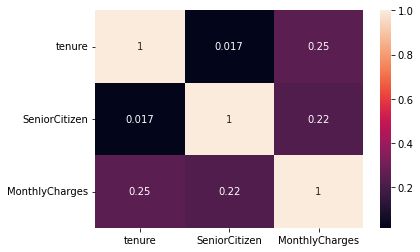

In [8]:
correlations_matrix = X.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

#### Build the logistic regression model.

In [9]:
#train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
#train transformer
transformer = StandardScaler().fit(X_train)  

#transform X_train 
X_train_scaled = pd.DataFrame(transformer.transform(X_train),columns=X.columns) 

#transform the X_test
X_test_scaled = pd.DataFrame(transformer.transform(X_test),columns=X.columns)

In [11]:
X_train_scaled.head()

,tenure,SeniorCitizen,MonthlyCharges
0,1.612532,-0.439763,0.674154
1,-0.747907,2.273954,-0.614894
2,1.571835,-0.439763,-1.335097
3,0.025340,-0.439763,0.301578
4,0.595101,-0.439763,1.128231


In [12]:
X_test_scaled.head()

,tenure,SeniorCitizen,MonthlyCharges
0,-0.544421,-0.439763,-0.220695
1,1.124165,-0.439763,1.722025
2,-0.788605,-0.439763,0.236709
3,-1.276971,-0.439763,-1.476477
4,0.920679,-0.439763,0.429651


In [13]:
y_train.head()

2920     No
2966     No
6099     No
5482    Yes
2012    Yes
Name: Churn, dtype: object

In [14]:
#reset index
y_train = y_train.reset_index(drop=True) 
y_test = y_test.reset_index(drop=True) 

In [15]:
y_train.head()

0     No
1     No
2     No
3    Yes
4    Yes
Name: Churn, dtype: object

In [30]:
#logistic regression
LR = LogisticRegression(random_state=0, solver='lbfgs')

#fit model on training data
LR.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

In [17]:
#test the model on testing data
LR.score(X_test_scaled, y_test)

0.7821149751596878

#### Even a simple model will give us more than 70% accuracy score because our data has a significant imbalance

<AxesSubplot:>

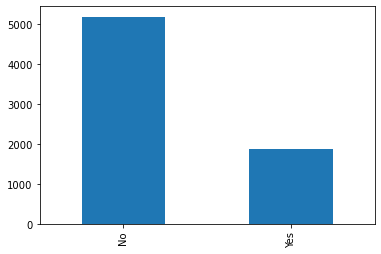

In [18]:
datacount = data['Churn'].value_counts()
datacount
datacount.plot(kind = 'bar')

In [19]:
#predictions
pred = LR.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred,pos_label='Yes'))
print("recall: ",recall_score(y_test,pred,pos_label='Yes'))
print("f1: ",f1_score(y_test,pred,pos_label='Yes'))

precision:  0.6101083032490975
recall:  0.4592391304347826
f1:  0.524031007751938


In [20]:
confusion_matrix(y_test,pred)

array([[933, 108],
       [199, 169]])

#### Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model.

In [21]:
from imblearn.over_sampling import SMOTE

In [26]:
sm = SMOTE(random_state=100, k_neighbors=4)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_scaled,y_train)

In [27]:
X_train_SMOTE.shape

(8266, 3)

In [28]:
LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_SMOTE, y_train_SMOTE)
pred = LR.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred,pos_label='Yes'))
print("recall: ",recall_score(y_test,pred,pos_label='Yes'))
print("f1: ",f1_score(y_test,pred,pos_label='Yes'))

precision:  0.47491039426523296
recall:  0.720108695652174
f1:  0.572354211663067


In [29]:
confusion_matrix(y_test,pred)

array([[748, 293],
       [103, 265]])

#### There is an improvement in recall from 45% to 72%. True positives increased by 96.